In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
#Get list of columns in each table.
print(Base.classes.measurement.__table__.columns.keys())
print()
print(Base.classes.station.__table__.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latestdate = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(latestdate)

('2017-08-23',)


2016-08-23
Date             datetime64[ns]
Precipitation           float64
dtype: object
(2230, 2)


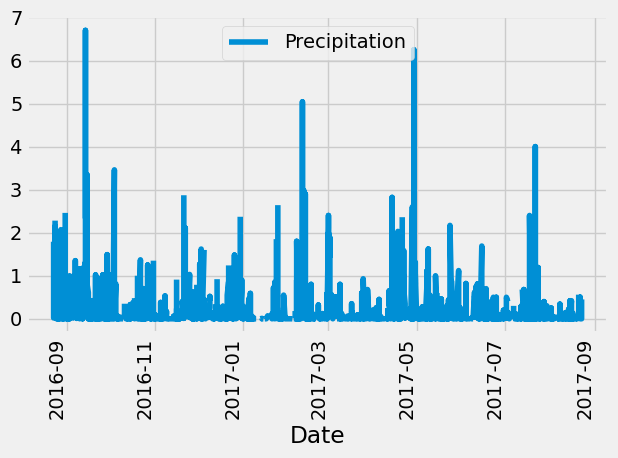

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dateforcalc = latestdate.date.split('-')

# Calculate the date one year from the last date in data set.
startdate = dt.date(int(dateforcalc[0]),int(dateforcalc[1]),int(dateforcalc[2])) - dt.timedelta(days=365)
print(startdate)
# Perform a query to retrieve the data and precipitation scores
raindata = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=startdate).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rainfall = pd.DataFrame(raindata,columns=['Date','Precipitation'])
# Sort the dataframe by date
rainfall = rainfall.sort_values('Date')
rainfall['Date'] = pd.to_datetime(rainfall['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

rainfall.plot(x = 'Date', y = 'Precipitation', rot = 90)
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
statcount = session.query(Station.station).distinct().count()
statcount

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activestat = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
print(activestat)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).first()
mas = mostactive[0]
temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == mas).all()
print(temps)

[(54.0, 85.0, 71.66378066378067)]


(array([ 6., 10., 15., 27., 41., 58., 72., 86., 29.,  8.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <BarContainer object of 10 artists>)

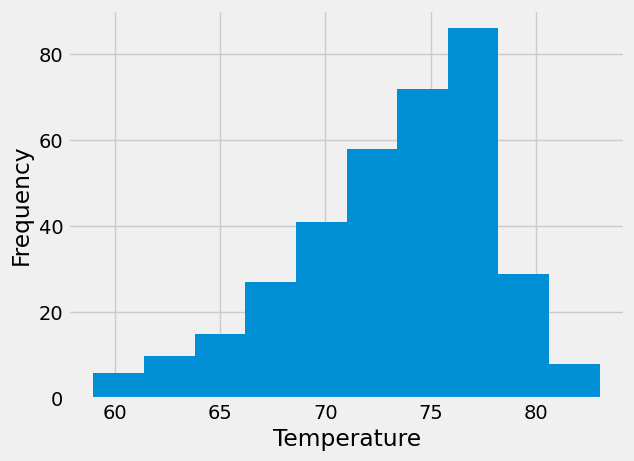

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yeartemp = session.query(Measurement.tobs).filter(Measurement.date>=startdate).filter(Measurement.station == mas).all()
tempsforhist=[]
for x in yeartemp:
    tempsforhist.append(x.tobs)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.hist(tempsforhist)

# Close Session

In [16]:
# Close Session
session.close()